# __Customer Churn Prediction LP 2__

## __1. Business Understanding__

#### __1.0 Project Description__
__Problem Statement:__

This project focuses on Customer Churn Prediction with the goal of utilizing machine learning classification models to analyze customer behavior and forecast churn. The objective is to enhance profitability and customer retention for the telecom company. By employing supervised learning techniques, the project aims to develop reliable models capable of accurately categorizing customers into churn or non-churn segments using diverse data attributes like transaction history, demographics, and interaction patterns. 

__Goal:__

The overarching aim is to equip businesses with actionable insights to preemptively detect and address churn risks, thereby nurturing enduring customer relationships and optimizing revenue margins.








#### __1.1 Scope of Work__
The scope of the project encompasses comprehensive phases including data preprocessing, feature engineering, model development utilizing various classification algorithms, rigorous evaluation, establishment of monitoring mechanisms for real-time performance tracking, thorough documentation and knowledge transfer, rigorous quality assurance and testing procedures, and active stakeholder communication and collaboration throughout the project lifecycle. The project aims to deliver a robust Customer Churn Prediction System that enables businesses to proactively identify and mitigate churn risks, optimize customer retention strategies, and drive sustained profitability and growth.

#### __1.2 Hypothesis__
**Null Hypothesis (H0)** : There is no likelyhood of customers leaving before three years elapse.
 
**Alternative Hypothesis(H1)** : There is  likelyhood of customers leaving before three years elapse.
 
#### __1.3 Analytical Questions__
1. How does method of payment affect churning?
2. Does the type of contract affect rate at which customers leave?
3. What is the impact of monthly charges to customer churning?
4. Does presence of a partner affect likelyhood of churn?
5. What is the relationship of type of internet service and churning?
6. Which gender is churning at a higher rate?


### __2. Data Understanding__


### __2.0 Importation of Different Libraries__

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.dates import YearLocator
from matplotlib.ticker import FuncFormatter
#For Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

# For Database Connection
import pyodbc
from dotenv import dotenv_values
import os

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import TransformerMixin
from sklearn.metrics import classification_report

# For Filter Warnings
import warnings
warnings.filterwarnings("ignore")

### __2.2 Loading and Inspection of Data__

__2.2.1 Loading Data from SQL Server__

In [2]:
##Loading environment variables from .env files 
environment_variables = dotenv_values(".env")

##Getting values of the credentials set in the .env file
server = os.getenv("SERVER")
database = os.getenv("DATABASE")
username = os.getenv("USERNAME")
password = os.getenv("PASSWORD")

##Constructing the connection string
connection_string = f"DRIVER=SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [3]:
connection = pyodbc.connect(connection_string)

In [4]:
##sql query to retrieve data from the table LP1_startup_2020
query1="SELECT * FROM dbo.LP2_Telco_churn_first_3000"

##execute the sql query and load into pandas DataFrame
data1 = pd.read_sql(query1,connection)


#### __2.2.2 Loading CSV Files__

In [5]:
data2 = pd.read_csv(r"C:\Users\USER\Documents\Azubi Africa Class\Classification Project LP2\Classification-Project-LP2\Data\LP2_Telco-churn-second-2000.csv")

#### __2.3 Overview of Data 1 and Data 2__

__2.3.1 Data1__

In [6]:
# Overview of data1
data1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [7]:
# Number of columns and rows in data1
print (data1.shape)
print(f"There are {data1.shape[0]} rows, and {data1.shape[1]} columns")

(3000, 21)
There are 3000 rows, and 21 columns


In [8]:
# check info for data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
# Describe data1
data1.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [10]:
# checking for duplicates
print("There are ",data1.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [11]:
# Checking for missing values
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

__2.3.2 Data2__

In [12]:
# Overview of data2
data2.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [13]:
# Number of columns and rows in data1
print (data2.shape)
print(f"There are {data2.shape[0]} rows, and {data2.shape[1]} columns")

(2043, 21)
There are 2043 rows, and 21 columns


In [14]:
# check info for data2
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [15]:
# Describe data2
data2.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2043.000000,2043.000000,2043.000000
mean,0.168380,32.649046,64.712555
std,0.374295,24.376248,29.970010
min,0.000000,0.000000,18.550000
25%,0.000000,9.000000,35.825000
50%,0.000000,30.000000,70.250000
75%,0.000000,55.000000,89.625000
max,1.000000,72.000000,118.350000


In [16]:
# checking for duplicates
print("There are ",data2.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [17]:
# Checking for missing values
data2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2.4 Concatenation of Datasets

In [18]:
def concat_dataframes(data1, data2):
    """
    Concatenates two dataframes along the row axis.

    Parameters:
    data1 (pandas.DataFrame): The first dataframe to concatenate.
    data2 (pandas.DataFrame): The second dataframe to concatenate.

    Returns:
    pandas.DataFrame: The concatenated dataframe.
    """
    # Rename columns to make them consistent across dataframes
    data1 = data1.rename(columns= {'customerID':'customerid', 'gender':'gender', 'SeniorCitizen':'seniorcitizen', 'Partner':'partner', 'Dependents':'dependents',
       'tenure':'tenure', 'PhoneService':'phoneservice', 'MultipleLines':'multiplelines', 'InternetService':'internetservice',
       'OnlineSecurity':'onlinesecurity', 'OnlineBackup':'onlinebackup', 'DeviceProtection':'deviceprotection', 'TechSupport':'techsupport',
       'StreamingTV':'streamingtv', 'StreamingMovies':'streamingmovies', 'Contract':'contract', 'PaperlessBilling':'paperlessbilling',
       'PaymentMethod':'paymentmethod', 'MonthlyCharges':'monthlycharges', 'TotalCharges':'totalcharges', 'Churn':'churn'})
    
    data2 = data2.rename(columns={'customerID':'customerid', 'gender':'gender', 'SeniorCitizen':'seniorcitizen', 'Partner':'partner', 'Dependents':'dependents',
       'tenure':'tenure', 'PhoneService':'phoneservice', 'MultipleLines':'multiplelines', 'InternetService':'internetservice',
       'OnlineSecurity':'onlinesecurity', 'OnlineBackup':'onlinebackup', 'DeviceProtection':'deviceprotection', 'TechSupport':'techsupport',
       'StreamingTV':'streamingtv', 'StreamingMovies':'streamingmovies', 'Contract':'contract', 'PaperlessBilling':'paperlessbilling',
       'PaymentMethod':'paymentmethod', 'MonthlyCharges':'monthlycharges', 'TotalCharges':'totalcharges', 'Churn':'churn'})
    
    # Concatenate dataframes along the row axis
    return pd.concat([data1, data2]).reset_index(drop=True)
    return result

In [19]:
## combined dataset (df)
df = concat_dataframes(data1,data2)
df.head()


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [20]:
df = df.reset_index(drop=True)

#### __2.4 Exploratory Data Analysis__ ####

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


#### __Dataset Columns__ ####

| Feature Name  | Description                                              | Data Type      |
|---------------|----------------------------------------------            |----------------|
| customerid    | Unique identifier for each customer                      | categorical    |
| gender        | Gender of the customer female or male                    | categorical    |
| seniorcitizen | Whether the customer is a senior citizen(0,1)            | numeric,int    |
| partner       | Whether the customer has a partner(Yes,No)               | categorical    |
| dependents    | Whether the customer has dependents(Yes,No)              | categorical    |
| tenure        | Number of months the customer has stayed                 | numeric,int    |
| phoneservice  | Whether the customer has phone service(Yes,No)           |categorical
| multiplelines  | Whether the customer has multiple lines(Yes,No,No phone service)          | categorical    |
| internetservice| Type of internet service(DSL,Fibre optic,No)             | categorical    |
| onlinesecurity | Whether the customer has online security(Yes,No,No internet service)| categorical    |
| onlinebackup   | Whether the customer has online backup(Yes,No,No internet service)         | categorical|
| deviceprotection| Whether the customer has device protection(Yes,No,No internet service)     | categorical|
| techsupport     | Whether the customer has tech support(Yes,No,No internet service)          | categorical|
| streamingtv       | Whether the customer has streaming TV(Yes,No,No internet service)          | categorical|
| streamingmovies   | Whether the customer has streaming movies(Yes,No,No internet service)      |categorical|
| contract          | Type of contract(month-to-month,one year,two years)                               |categorical|
| paperlessbilling  | Whether the customer has paperless billing(Yes,No)     |categorical|
| paymentmethod     | Payment method used by the customer(Electronic check,Mailed check,Bank transfer, Credit card)            | Object (String)|
| monthlycharges    | Monthly charges                                | numeric,int          |
| totalcharges      | Total charges                                  | numeric,int|
| churn             | Whether the customer churned (left) (Yes,No)   |categorical|

In [23]:
# check descriptive statistics
df.describe(include='all')

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
count,5043,5043,5043.000000,5043,5043,5043.000000,5043,4774,5043,4392,...,4392,4392,4392,4392,5043,5043,5043,5043.000000,5038.000000,5042
unique,5043,2,NaN,4,4,NaN,4,5,3,5,...,5,5,5,5,3,4,4,NaN,4884.000000,4
top,7590-VHVEG,Male,NaN,False,False,NaN,True,False,Fiber optic,False,...,False,False,False,True,Month-to-month,True,Electronic check,NaN,20.200001,False
freq,1,2559,NaN,1538,2070,NaN,2731,1437,2248,1478,...,1296,1476,1190,1199,2744,1776,1700,NaN,5.000000,2219
mean,NaN,NaN,0.162403,NaN,NaN,32.576641,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.090214,NaN,NaN
std,NaN,NaN,0.368857,NaN,NaN,24.529807,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.068133,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.775000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.550003,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.050003,NaN,NaN


In [24]:
# Check summary statistics of categorical columns
df.describe(include="object").T

,count,unique,top,freq
customerid,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
partner,5043,4,False,1538
dependents,5043,4,False,2070
phoneservice,5043,4,True,2731
multiplelines,4774,5,False,1437
internetservice,5043,3,Fiber optic,2248
onlinesecurity,4392,5,False,1478
onlinebackup,4392,5,False,1320
deviceprotection,4392,5,False,1296


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


In [26]:
# Checking for missing values
df.isnull().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          5
churn                 1
dtype: int64

In [27]:
# checking for duplicates
print("There are ",df.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [28]:
# Create dictionary of unique values for all columns
unique_values = {column: list(df[column].unique()) for column in df.columns}

# Print unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in '{column}': {values}")

Unique values in 'customerid': ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU', '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU', '9763-GRSKD', '7469-LKBCI', '8091-TTVAX', '0280-XJGEX', '5129-JLPIS', '3655-SNQYZ', '8191-XWSZG', '9959-WOFKT', '4190-MFLUW', '4183-MYFRB', '8779-QRDMV', '1680-VDCWW', '1066-JKSGK', '3638-WEABW', '6322-HRPFA', '6865-JZNKO', '6467-CHFZW', '8665-UTDHZ', '5248-YGIJN', '8773-HHUOZ', '3841-NFECX', '4929-XIHVW', '6827-IEAUQ', '7310-EGVHZ', '3413-BMNZE', '6234-RAAPL', '6047-YHPVI', '6572-ADKRS', '5380-WJKOV', '8168-UQWWF', '8865-TNMNX', '9489-DEDVP', '9867-JCZSP', '4671-VJLCL', '4080-IIARD', '3714-NTNFO', '5948-UJZLF', '7760-OYPDY', '7639-LIAYI', '2954-PIBKO', '8012-SOUDQ', '9420-LOJKX', '6575-SUVOI', '7495-OOKFY', '4667-QONEA', '1658-BYGOY', '8769-KKTPH', '5067-XJQFU', '3957-SQXML', '5954-BDFSG', '0434-CSFON', '1215-FIGMP', '0526-SXDJP', '0557-ASKVU', '5698-BQJOH', '5122-CYFXA', '8627-ZYGSZ', '3410-YOQBQ', '3170-NMYVV', '7

- In columns like onlinebackup and onlinesecurity, there is 'No' and 'No internet service which is the same thing. So we convert both to 'No'. 

In [29]:
df['multiplelines']= df['multiplelines'].replace('No phone service', 'No')
df[['onlinesecurity', 
   'onlinebackup',
   'techsupport',
   'streamingtv',
   'streamingmovies',
   'deviceprotection']] = df[['onlinesecurity', 
                              'onlinebackup',
                              'techsupport',
                               'streamingtv',
                               'streamingmovies',
                               'deviceprotection']].replace('No internet service','No')                                                        

In [30]:
# Create dictionary of unique values for all columns
unique_values = {column: list(df[column].unique()) for column in df.columns}

# Print unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in '{column}': {values}")

Unique values in 'customerid': ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU', '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU', '9763-GRSKD', '7469-LKBCI', '8091-TTVAX', '0280-XJGEX', '5129-JLPIS', '3655-SNQYZ', '8191-XWSZG', '9959-WOFKT', '4190-MFLUW', '4183-MYFRB', '8779-QRDMV', '1680-VDCWW', '1066-JKSGK', '3638-WEABW', '6322-HRPFA', '6865-JZNKO', '6467-CHFZW', '8665-UTDHZ', '5248-YGIJN', '8773-HHUOZ', '3841-NFECX', '4929-XIHVW', '6827-IEAUQ', '7310-EGVHZ', '3413-BMNZE', '6234-RAAPL', '6047-YHPVI', '6572-ADKRS', '5380-WJKOV', '8168-UQWWF', '8865-TNMNX', '9489-DEDVP', '9867-JCZSP', '4671-VJLCL', '4080-IIARD', '3714-NTNFO', '5948-UJZLF', '7760-OYPDY', '7639-LIAYI', '2954-PIBKO', '8012-SOUDQ', '9420-LOJKX', '6575-SUVOI', '7495-OOKFY', '4667-QONEA', '1658-BYGOY', '8769-KKTPH', '5067-XJQFU', '3957-SQXML', '5954-BDFSG', '0434-CSFON', '1215-FIGMP', '0526-SXDJP', '0557-ASKVU', '5698-BQJOH', '5122-CYFXA', '8627-ZYGSZ', '3410-YOQBQ', '3170-NMYVV', '7

__2.4.1 Issues Observed in the Data__

1. Total charge column needs to be converted from string to numerical. 
2. Totalcharge and churn columns have 5 and 1 missing values respectively.  
3. The features are not on the same scale and this is more profound on totalcharge feature.


__2.4.2 Course of Action on the Data__

1. Convert total charge column from string to numerical.
2. Drop customerid column since it has only ID values which has no predictive power on dependent variable. 

__2.5 Data Cleaning__

In [31]:
# check for unique values in totalcharges
unique_totalcharges = df['totalcharges'].unique()
unique_totalcharges

array([29.850000381469727, 1889.5, 108.1500015258789, ..., '346.45',
       '306.6', '6844.5'], dtype=object)

In [32]:
# Drop rows where tenure = 0
# df.drop(labels=df[df['tenure']== 0].index,axis=0, inplace=True)

- We have some missing values on totalcharge column with tenure of 0. Let us drop the rows with tenure of 0.

In [33]:
# Identify categorical columns
categorical_columns = df.select_dtypes(['category']).columns

# Convert each categorical column to object datatype
for col in categorical_columns:
    df[col] = df[col].astype('object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


In [35]:
# Drop customerid column
# df= df.drop(['customerid'], axis =1)
# df.info()

2.5.1 Dealing with Missing Values

In [36]:
 # Input missing values with the mode
columns_to_replace= ['multiplelines','onlinesecurity',
                   'onlinebackup','deviceprotection','techsupport','streamingtv',
                    'streamingmovies','churn','totalcharges' 
                   ] 

for column in columns_to_replace:
  df[column].fillna(df[column].mode()[0],inplace=True)

In [37]:
# Drop missing value in the churn column because it just one. 
# df.dropna(subset='churn',inplace=True)

In [38]:
# Drop rows where tenure = 0
# df.drop(labels=df[df['tenure']== 0].index,axis=0, inplace=True)

- We have some missing values on totalcharge column with tenure of 0 meaning customers have not subribe to company services. Let us drop the rows with tenure of 0.

In [39]:
# check missing values 
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64


Column: partner
partner
No     2585
Yes    2458
Name: count, dtype: int64

Column: dependents
dependents
No     3482
Yes    1561
Name: count, dtype: int64

Column: phoneservice
phoneservice
Yes    4554
No      489
Name: count, dtype: int64

Column: multiplelines
multiplelines
No     2913
Yes    2130
Name: count, dtype: int64

Column: onlinesecurity
onlinesecurity
No     3587
Yes    1456
Name: count, dtype: int64

Column: onlinebackup
onlinebackup
No     3311
Yes    1732
Name: count, dtype: int64

Column: deviceprotection
deviceprotection
No     3299
Yes    1744
Name: count, dtype: int64

Column: techsupport
techsupport
No     3552
Yes    1491
Name: count, dtype: int64

Column: streamingtv
streamingtv
No     3098
Yes    1945
Name: count, dtype: int64

Column: streamingmovies
streamingmovies
No     3061
Yes    1982
Name: count, dtype: int64

Column: paperlessbilling
paperlessbilling
Yes    2996
No     2047
Name: count, dtype: int64

Column: churn
churn
No     3707
Yes    1336
Name: coun

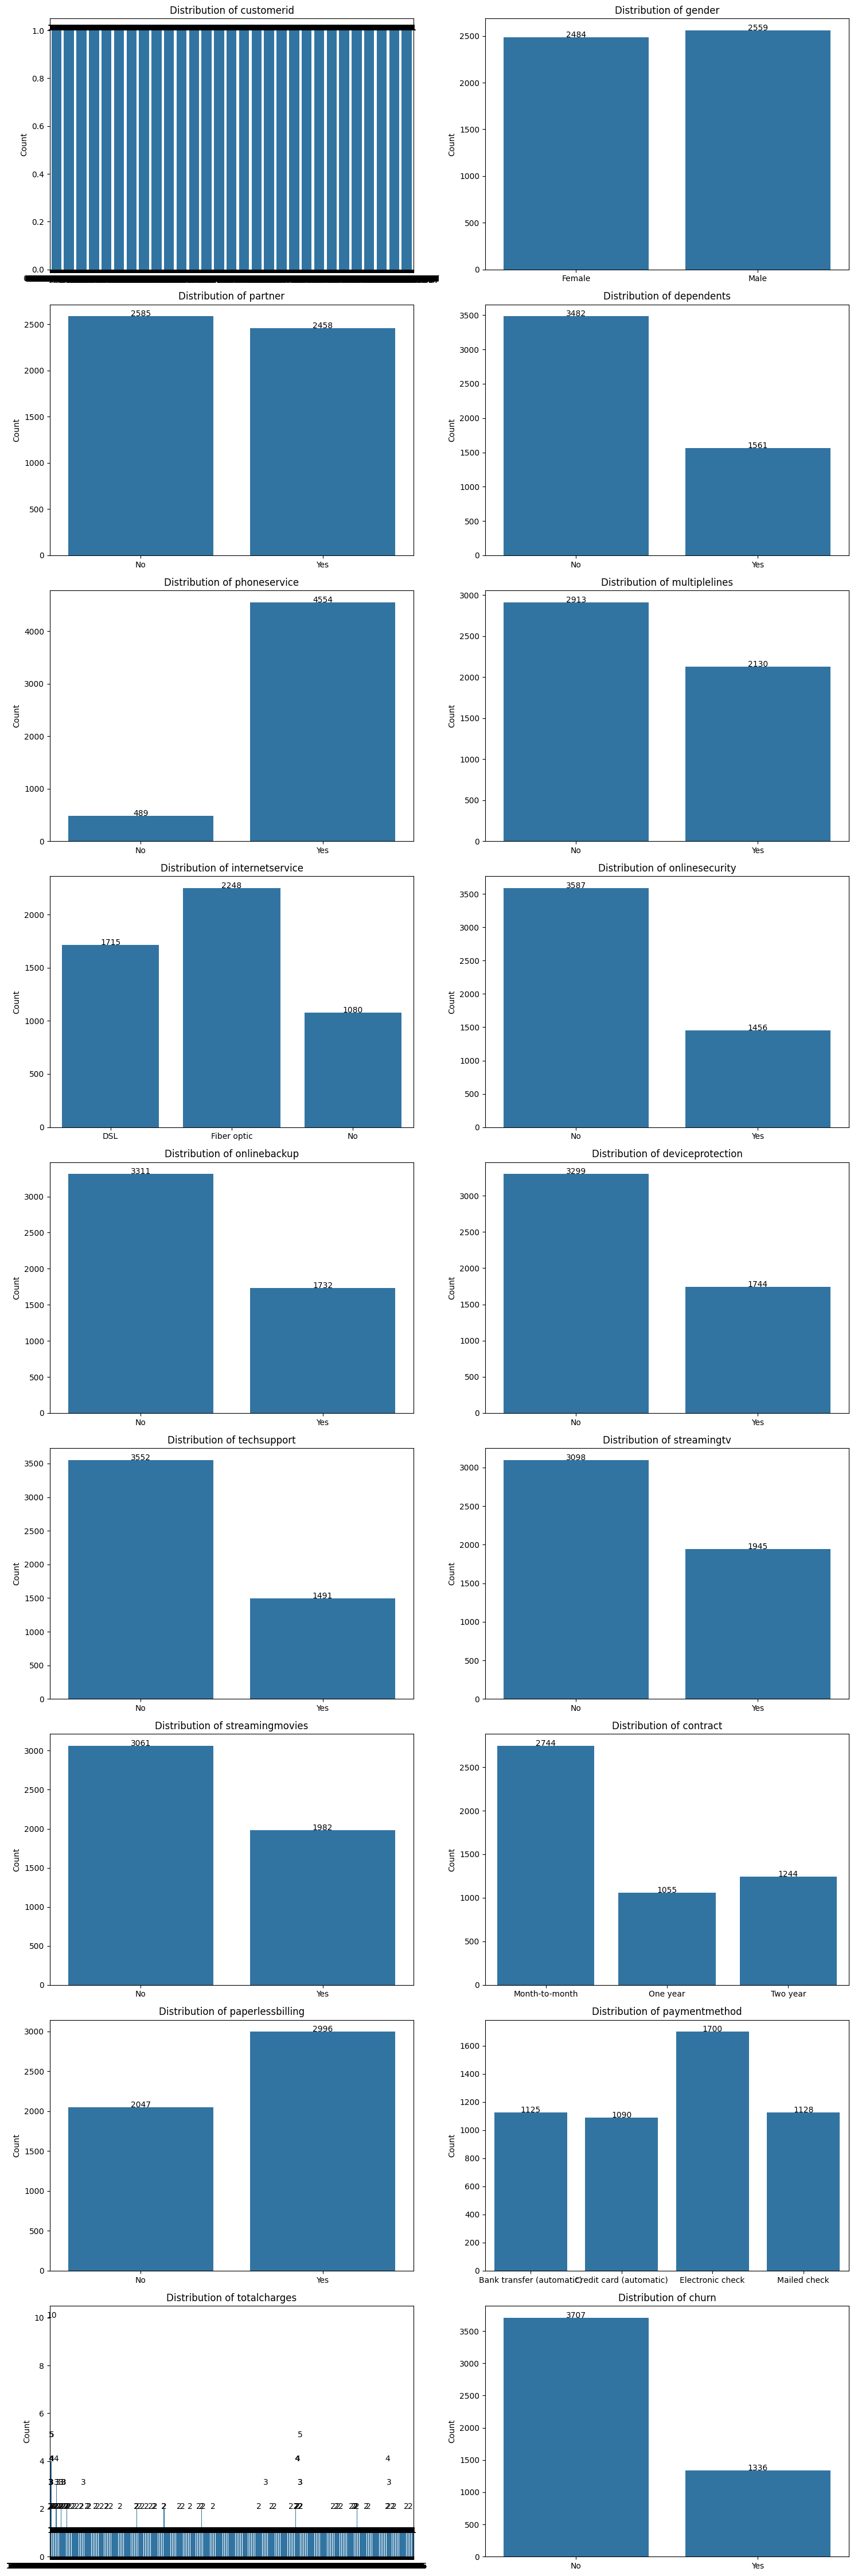

In [40]:
# Create a function to get the columns where False, True, Yes and No are present
def check_column_values(df):
    columns = []
    for column in df.columns:
        unique_values = df[column].astype(str).unique()  # Convert values to strings
        if all(value.lower() in [x.lower() for x in unique_values] for value in ['True', 'False', 'Yes', 'No']):
            columns.append(column)
    return columns
def filtered_target_columns(check_column_values):
    target_columns = check_column_values(df)
    return target_columns
target_columns = filtered_target_columns(check_column_values)
target_columns

# Create a function that maps the column values and replaces True with Yes and False with No
def unify_column_values(df,columns):
    for column in columns:
        df[column]=df[column].replace({True:'Yes',False:'No'})
def unified_columns():
    return target_columns
 
unify_column_values(df,unified_columns())


# Create a function to print the unified columns and the number of values for each category
def get_clean_target_columns(df, target_columns):
    def clean_target_columns(column):
        return column
    result = {}
    for column in df.columns:
        if column in target_columns:
            column_values = df[column].value_counts()
            column_values.columns = [column, 'count']
            result[clean_target_columns(column)] = column_values
    for column, column_df in result.items():
        print(f"\nColumn: {column}")
        print(column_df)
get_clean_target_columns(df, target_columns)

# Function to plot distribution of categorical columns
def categorical_distribution(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')
    cat_cols = df.select_dtypes(include='category').columns
    n_plots = len(cat_cols)
    num_rows = (n_plots + 1) // 2  # Calculate number of rows needed
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))  # 2 columns
    for i, col in enumerate(cat_cols):
        row_index = i // 2
        col_index = i % 2
        sns.countplot(data=df, x=col, ax=axes[row_index, col_index])
        [axes[row_index, col_index].text(p.get_x() + p.get_width() / 2., p.get_height(),
                                         int(p.get_height()), ha='center') for p in axes[row_index, col_index].patches]
        axes[row_index, col_index].set(title=f"Distribution of {col}", xlabel="", ylabel="Count")
    plt.tight_layout()
    plt.show()
       
categorical_distribution(df)

#### 2.5.2 Seperate categorical and numerical columns for visualization ####

In [41]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include= np.number).columns.tolist()
print('Categorical Variables')
print(cat_cols)
print('Numerical Variables')
print(num_cols)

Categorical Variables
Index([], dtype='object')
Numerical Variables
['seniorcitizen', 'tenure', 'monthlycharges']


__2.6 Univariate Analysis for Columns of Interest__

Skew:
seniorcitizen     1.83
tenure            0.23
monthlycharges   -0.24
dtype: float64


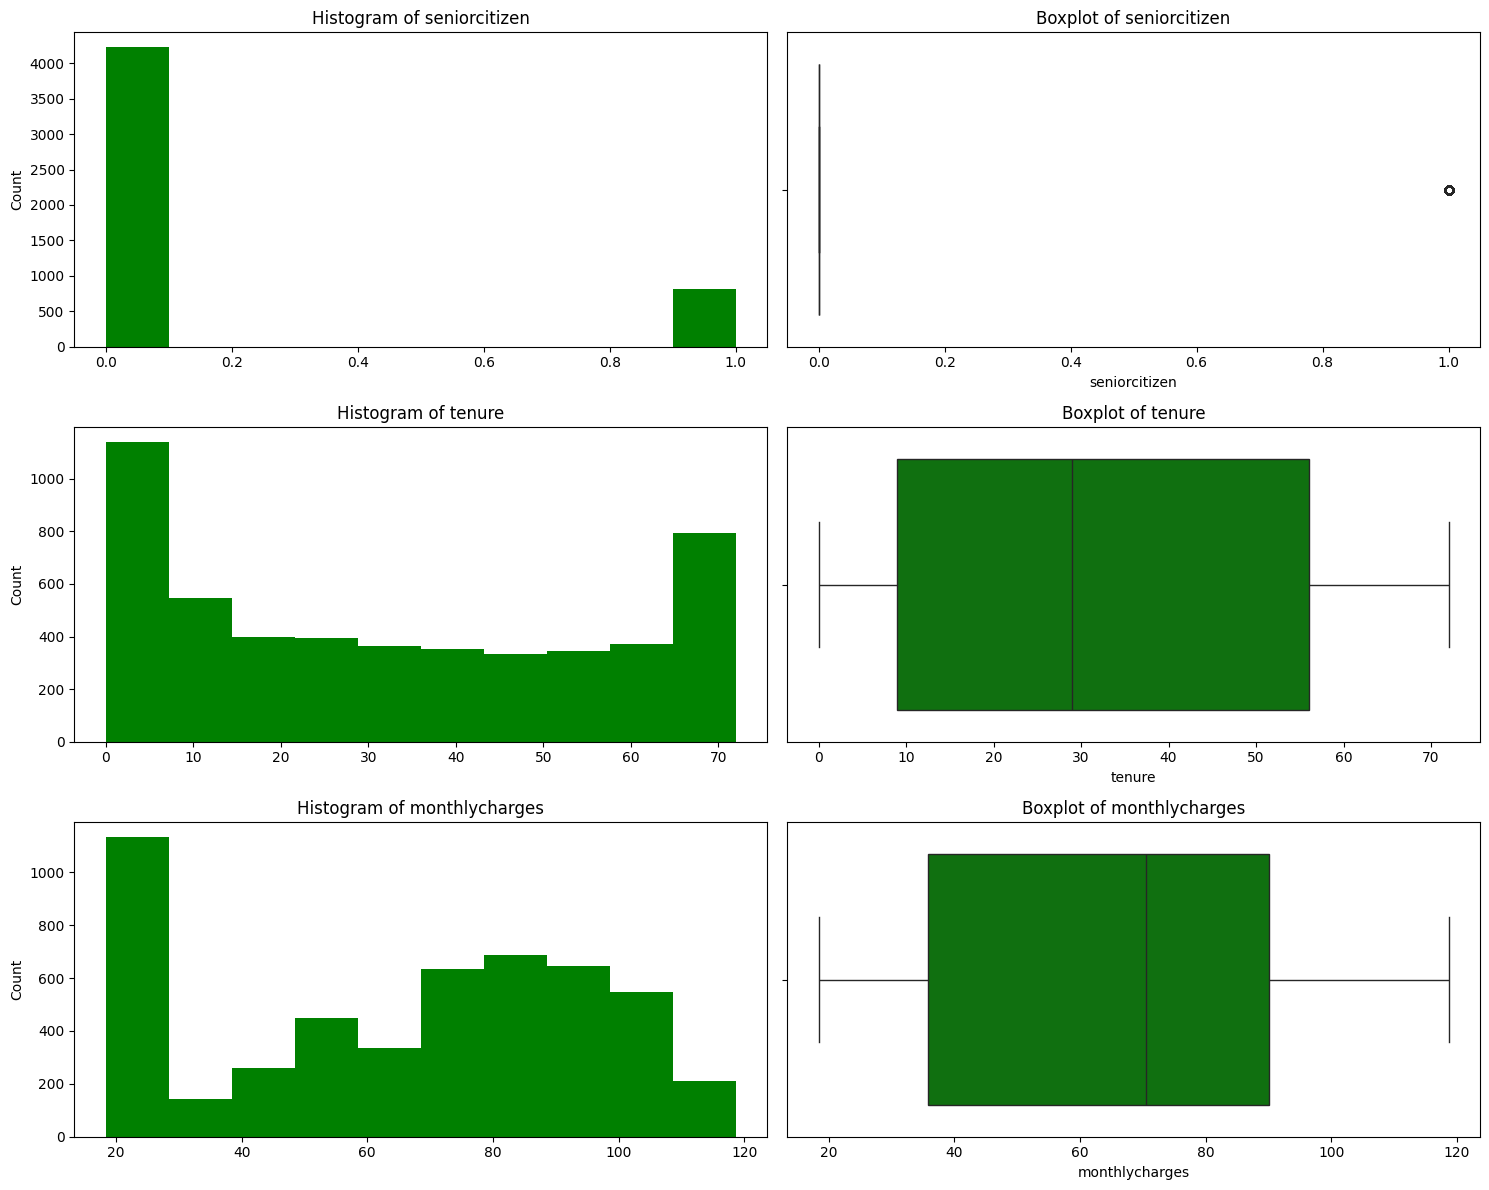

In [42]:
# Histographs and boxplots to plot distribution for numerical columns
print('Skew:')
print(round(df[num_cols].skew(), 2))

plt.figure(figsize=(15, 4 * len(num_cols)))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, i * 2 - 1)
    df[col].hist(grid=False, color='green')
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')

    plt.subplot(len(num_cols), 2, i * 2)
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

- The distribution of tenure is somehow assymetrical, indicating that a significant number of customers have relatively shorter tenures with some having long tenures. This suggests that the customer base may have a mix of both long-term and short-term customers.

#### 2.6.1 Check for Outliers ####

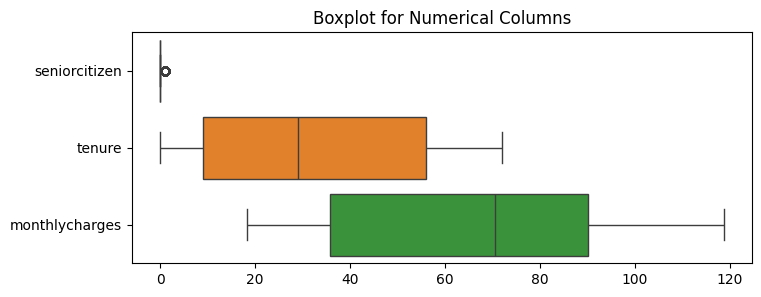

In [43]:
plt.figure(figsize=(8,3))
sns.boxplot(df.drop('totalcharges', axis=1), orient= 'h')
plt.title('Boxplot for Numerical Columns')
plt.show()

- We drop totalcharges and display it independently because it is highly scaled. 

####  __2.7 Bivariate Analysis__ 

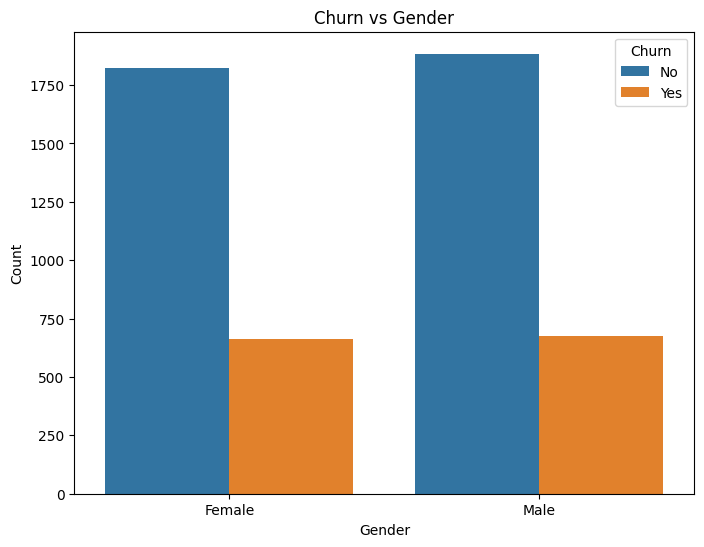

In [44]:
# Barplots to show relationshp of churn vs. other features 
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Churn vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

Insight: There is no significant difference in churn between male and female customers. Churn rates seem comparable across gender groups, indicating that gender may not be a strong predictor of churn in this dataset.

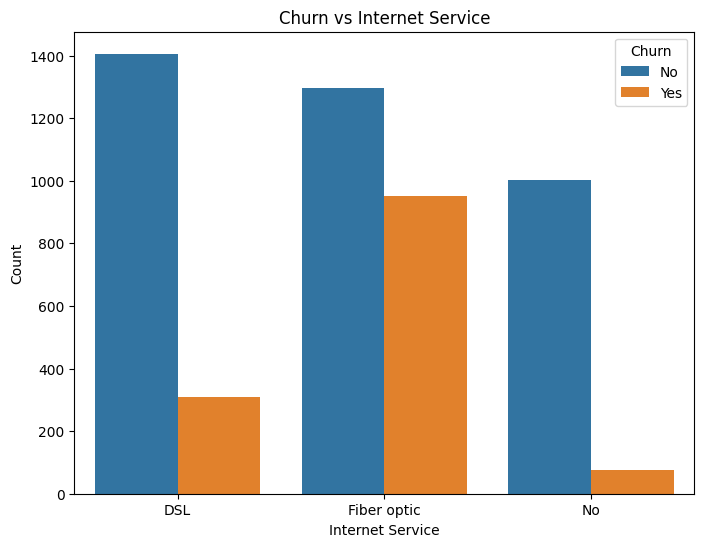

In [45]:
# Barplots to show relationshp of churn vs. internet service 
plt.figure(figsize=(8, 6))
sns.countplot(x='internetservice', hue='churn', data=df)
plt.title('Churn vs Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

Insight: Customers with fiber optic internet service are more likely to churn compared to those with DSL or no internet service. This suggests that the type of internet service may impact customer satisfaction and retention.

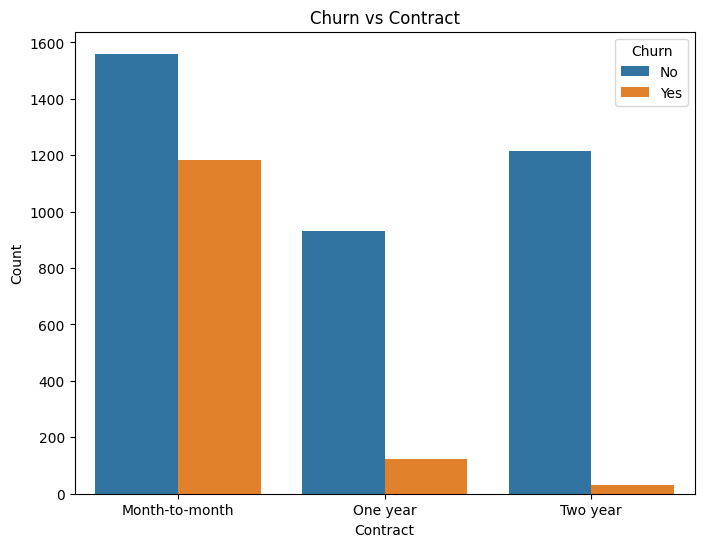

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='contract', hue='churn', data=df)
plt.title('Churn vs Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

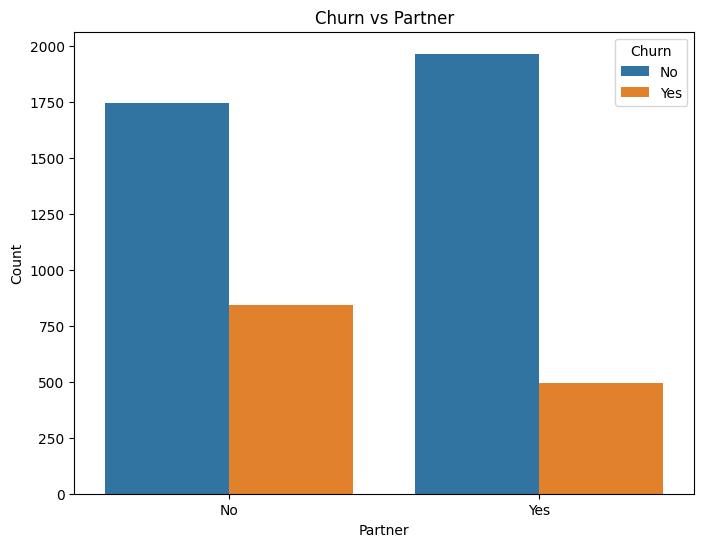

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='partner', hue='churn', data=df)
plt.title('Churn vs Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

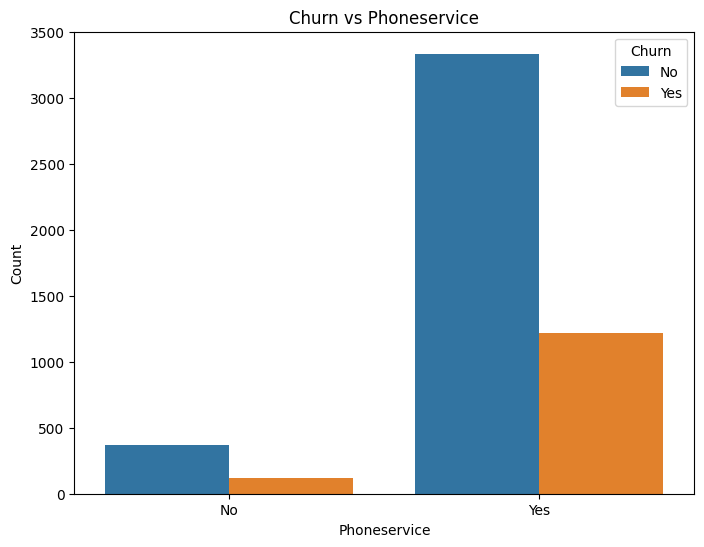

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='phoneservice', hue='churn', data=df)
plt.title('Churn vs Phoneservice')
plt.xlabel('Phoneservice')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

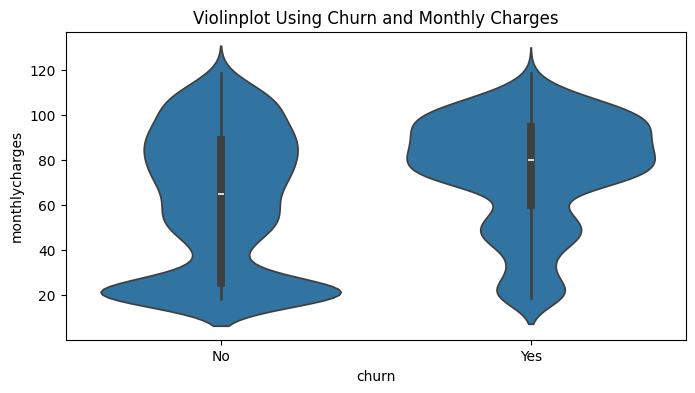

In [49]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x= 'churn',y='monthlycharges')
plt.title('Violinplot Using Churn and Monthly Charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

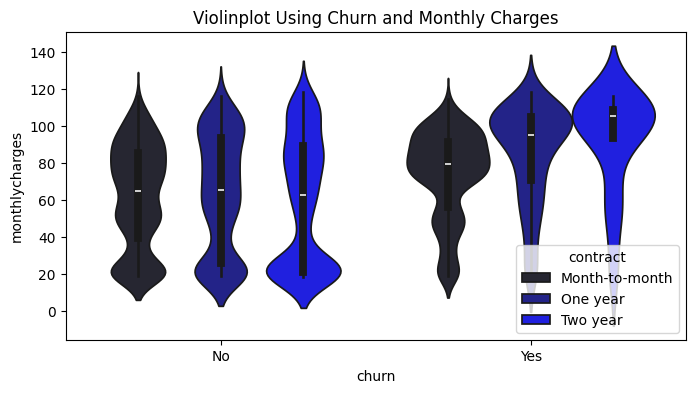

In [50]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x= 'churn',y='monthlycharges',hue='contract',palette= 'dark:blue')
plt.title('Violinplot Using Churn and Monthly Charges')
plt.show

#### __2.8 Multivariate Analysis__

<function matplotlib.pyplot.show(close=None, block=None)>

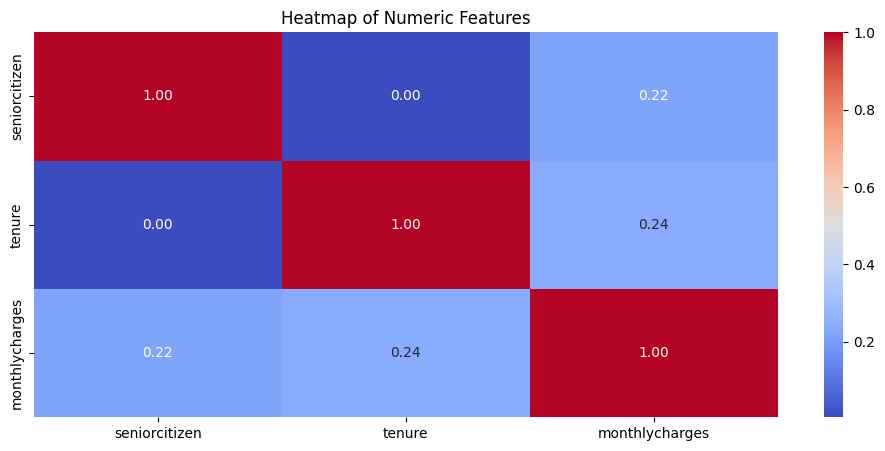

In [51]:
plt. figure(figsize=(12,5))
plt.title('Heatmap of Numeric Features')
correlation= df[num_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f',cmap='coolwarm')
plt.show

In [52]:
file_path = r'C:\Users\USER\Documents\Azubi Africa Class\Classification Project LP2\Classification-Project-LP2\Train2_df.csv'
df.to_csv(file_path, index=False)

### __2.9 Hypothesis Testing__ ###

**Null Hypothesis (H0)** : There is no likelyhood of customers leaving before three years elapse.
 
**Alternative Hypothesis(H1)** : There is  likelyhood of customers leaving before three years elapse.

In [53]:
# Create a subset of the DataFrame with 'churn' and 'tenure' columns
churn_tenure = df[['churn', 'tenure']]

# Separate tenure values for churned and non-churned customers
churned_tenure = churn_tenure[churn_tenure['churn'] == 'Yes']['tenure']
non_churned_tenure = churn_tenure[churn_tenure['churn'] == 'No']['tenure']

# Perform two-sample independent t-test assuming equal variances
t_statistic, p_value = stats.ttest_ind(churned_tenure, non_churned_tenure, equal_var=True)

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results of the t-test
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in tenure between churned and non-churned customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in tenure between churned and non-churned customers.")
print(f'The p-value is {p_value}')
print(f'The t-statistic is {t_statistic}')

Reject the null hypothesis. There is a significant difference in tenure between churned and non-churned customers.
The p-value is 5.087591210179861e-146
The t-statistic is -26.602280735046378


### __2.10 Answering Analytical Questions__

##### __1. How does method of payment affects churning?__ #####


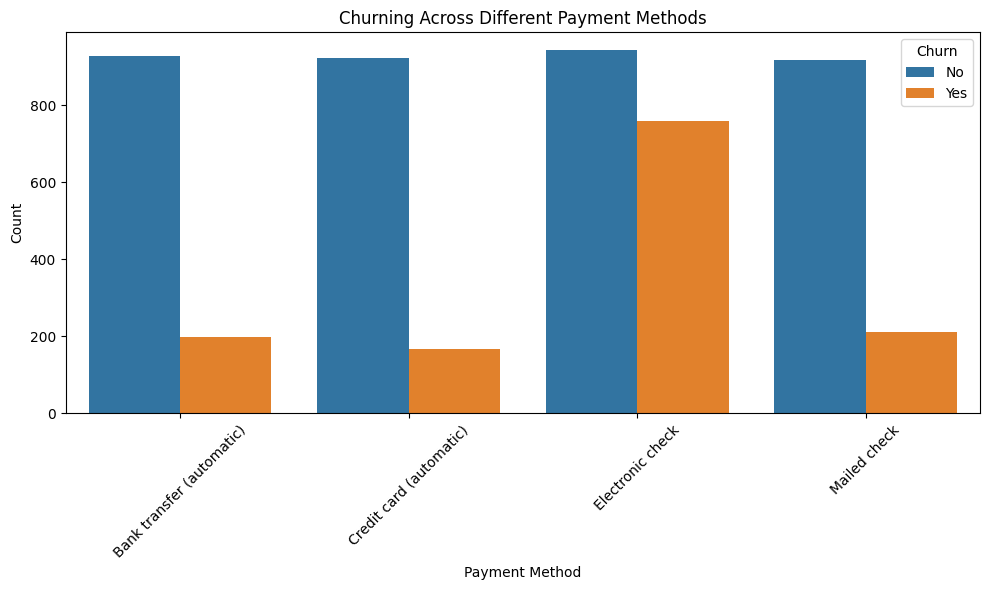

In [54]:
# countplot showing rate of churning across payment methods
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='paymentmethod', hue='churn')
plt.title('Churning Across Different Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

- Level of churning was varying across the payment methods with electronic check having the highest churn followed by mailed check, bank transfer and credit card respectively. The higher churn rate among customers using electronic check may indicate that these payment methods are associated with certain service-related issues or customer experience challenges.


##### __2. Does the type of contract affect rate at which customers leave?__ #####

<Figure size 1000x600 with 0 Axes>

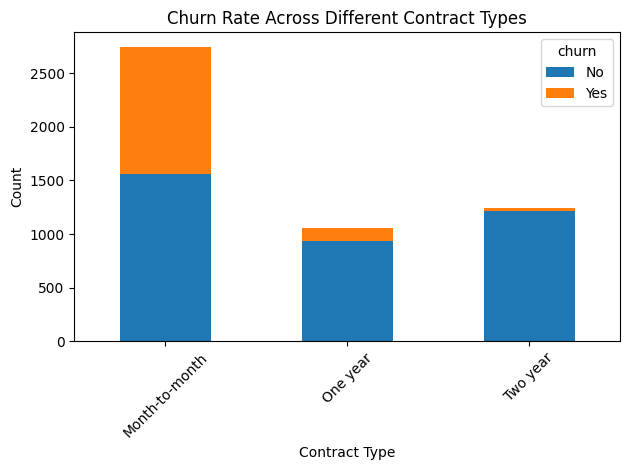

In [55]:
# Group the data by 'Contract' and 'Churn', and count the occurrences
contract_churn_counts = df.groupby(['contract', 'churn']).size().unstack()

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
contract_churn_counts.plot(kind='bar', stacked=True)
plt.title('Churn Rate Across Different Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='churn', loc='upper right')
plt.tight_layout()
plt.show()

- The type of contract is a significant predictor of churn as it varies across. Customers contracts of month-to-month had the highest level of churn, followed by contracts of one-year and two-year respectively.This indicates that contract length plays a significant role in customer retention, with long-term commitments generally associated with lower churn rates.

##### __3. What is the impact of monthly charges to customer churning?__ #####

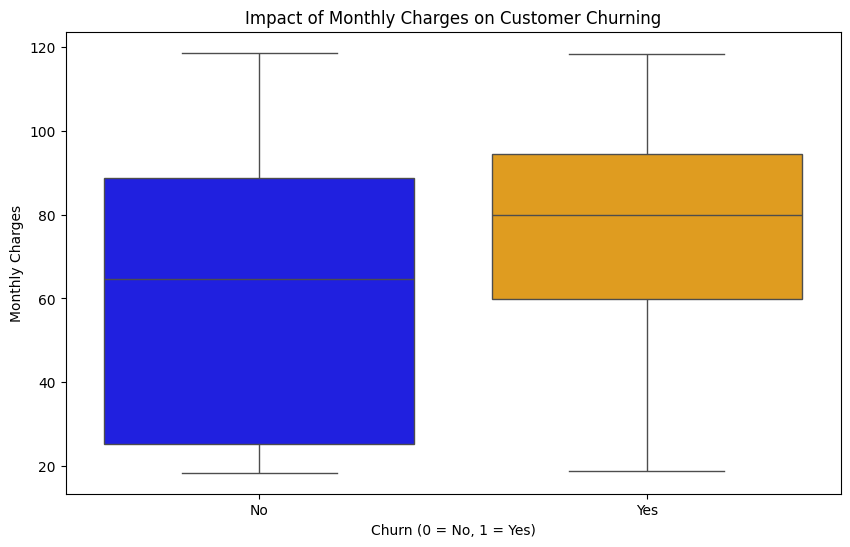

In [56]:
# Define custom color palette
custom_palette = {'No': 'blue', 'Yes': 'orange'}

# Create a box plot of monthly charges by churn status
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='monthlycharges', data=df, palette=custom_palette)
plt.title('Impact of Monthly Charges on Customer Churning')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

- The average monthly charge for churned customers is higher than for non-churned customers.This implies that, on average, customers who churned had higher monthly charges. The higher churn rate among customers with higher monthly charges may indicate dissatisfaction with the quality of services, customer support, or overall experience despite paying more.

##### __4. Does presence of a partner affect likelyhood of churn?__ #####


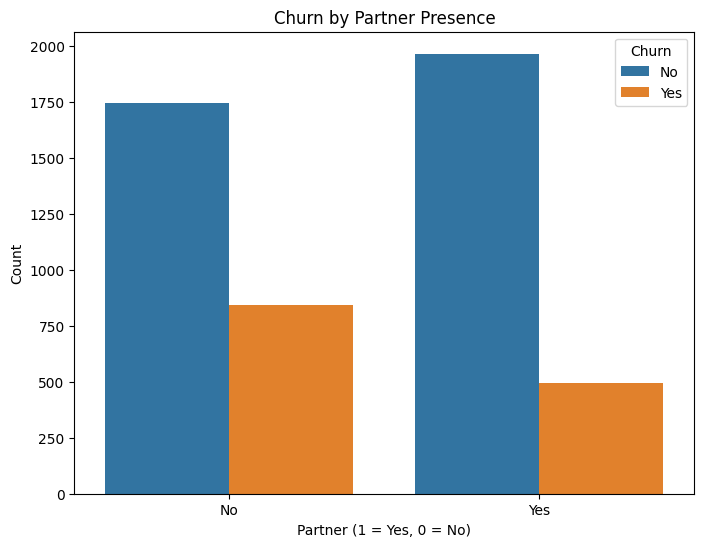

In [57]:
# countplot for churn by partner presence
plt.figure(figsize=(8, 6))
sns.countplot(x='partner', hue='churn', data=df)
plt.title('Churn by Partner Presence')
plt.xlabel('Partner (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

- The rate of churn was high for customers with no partners compared to customers with partners. This implies that married customers may perceive higher benefits from the services, influencing their decision to stay with the provider.

##### __5. What is the relationship of type of internet service and churning?__ #####

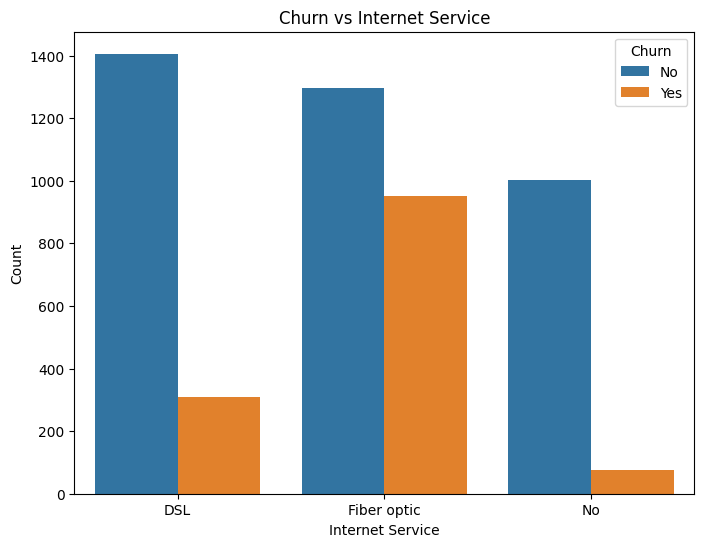

In [58]:
# Barplots to show relationshp of churn vs. internet service 
plt.figure(figsize=(8, 6))
sns.countplot(x='internetservice', hue='churn', data=df)
plt.title('Churn vs Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

- Customers with fiber optic internet service are more likely to churn compared to those with DSL or no internet service. This suggests that the type of internet service may impact customer satisfaction and retention.

##### __6. Which gender is churning at a higher rate?__ #####

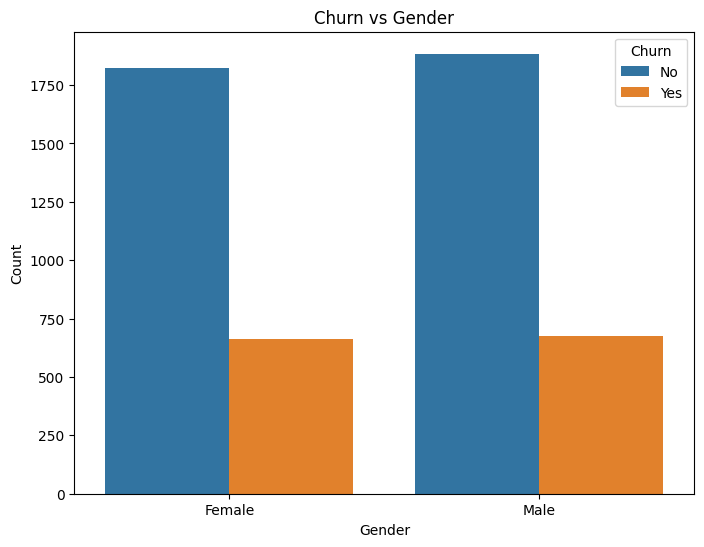

In [59]:
# Barplots to show rate of churn for Gender 
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Churn vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

- There is no significant difference in churn between male and female customers. Churn rates seem comparable across gender groups, indicating that gender may not be a strong predictor of churn in this dataset.

## __3 Data Preparation__ 

#### __3.1 Check if Dataset is Balanced__

In [60]:
print(df.columns)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [61]:
class_distr= df['churn'].value_counts().rename('Total').reset_index()
class_distr

,churn,Total
0,No,3707
1,Yes,1336


In [62]:
df['monthlycharges'] = pd.to_numeric(df['monthlycharges'], errors='coerce').astype(int)

# Convert to categorical
df['monthlycharges'] = pd.Categorical(df['monthlycharges'])

# Check the data type of the "monthlycharges" column after conversion
print(df['monthlycharges'].dtype)

category


In [63]:
# Assuming "df" is your DataFrame
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce').astype(float)

# Check the data type of the "totalcharges" column after conversion
print(df['totalcharges'].dtype)

float64


In [64]:
# Assuming "df" is your DataFrame
df['monthlycharges'] = pd.to_numeric(df['monthlycharges'], errors='coerce').astype(float)

# Check the data type of the "MonthlyCharges" column after conversion
print(df['monthlycharges'].dtype)

float64


In [65]:
class_distr['Ratio']= class_distr['Total'].apply(lambda x:round(( x/class_distr['Total'].sum()*100),2))
class_distr

,churn,Total,Ratio
0,No,3707,73.51
1,Yes,1336,26.49


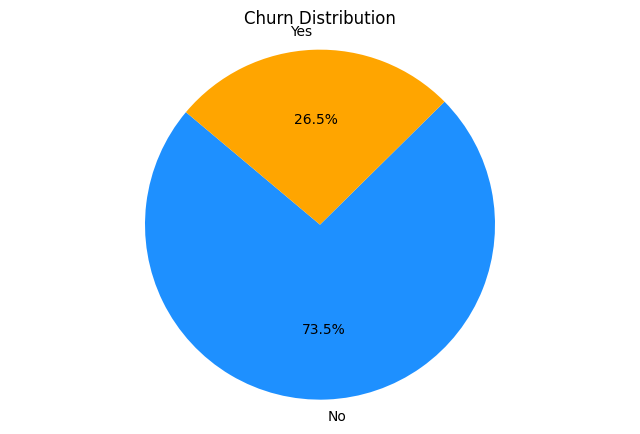

In [66]:
# Piechart to show the balance of dataset

# Data
labels = class_distr['churn']
sizes = class_distr['Ratio']
colors = ['#1E90FF','#FFA500']  # Orange and blue colors

# Plot
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#### __Typecasting of categorical columns to numeric__

In [67]:
# Change gender 'female' and 'male' to 1 and 0
# df['gender'].replace(['Male','Female'],[1,0],inplace = True)
# change partner 'Yes' and 'No' to 1 and 0
# df['partner'].replace(['Yes','No'],[1,0],inplace = True)
# change dependents 'Yes' and 'No' to 1 and 0
# df['dependents'].replace(['Yes','No'],[1,0],inplace = True)  
 # change phoneservice 'Yes' and 'No' to 1 and 0
# df['phoneservice'].replace(['Yes','No'],[1,0],inplace = True)
# change multiplelines 'Yes' and 'No' to 1 and 0
# df['multiplelines'].replace(['Yes','No'],[1,0],inplace = True) 
# change internetservice 'Yes' and 'No' to 1 and 0
# df['internetservice'].replace(['No','DSL','Fiber'],[0,1,2],inplace = True)
# change onlinesecurity 'Yes' and 'No' to 1 and 0
# df['onlinesecurity'].replace(['Yes','No'],[1,0],inplace = True)
# change onlinebackup 'Yes' and 'No' to 1 and 0
# df['onlinebackup'].replace(['Yes','No'],[1,0],inplace = True)
# change deviceprotection 'Yes' and 'No' to 1 and 0
# df['deviceprotection'].replace(['Yes','No'],[1,0],inplace = True)
# change techsupport 'Yes' and 'No' to 1 and 0
# df['techsupport'].replace(['Yes','No'],[1,0],inplace = True)
# change streamingtv 'Yes' and 'No' to 1 and 0
# df['streamingtv'].replace(['Yes','No'],[1,0],inplace = True)
# change streamingmovies 'Yes' and 'No' to 1 and 0
# df['streamingmovies'].replace(['Yes','No'],[1,0],inplace = True)
# change contract 'Yes' and 'No' to 1 and 0
# df['contract'].replace(['Month-to-month','One year','Two year'],[0,1,2],inplace = True)
# change paperlessbilling 'Yes' and 'No' to 1 and 0
# df['paperlessbilling'].replace(['Yes','No'],[1,0],inplace = True)
# change paymentmethod 'Yes' and 'No' to 1 and 0
# df['paymentmethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace = True)
# change churn 'Yes' and 'No' to 1 and 0
# df['churn'].replace(['Yes','No'],[1,0],inplace = True)


#### __3.2 Split Dataset into Training and Evaluation__

- X = input_data
- y = label


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        5043 non-null   category
 1   gender            5043 non-null   category
 2   seniorcitizen     5043 non-null   int64   
 3   partner           5043 non-null   category
 4   dependents        5043 non-null   category
 5   tenure            5043 non-null   int64   
 6   phoneservice      5043 non-null   category
 7   multiplelines     5043 non-null   category
 8   internetservice   5043 non-null   category
 9   onlinesecurity    5043 non-null   category
 10  onlinebackup      5043 non-null   category
 11  deviceprotection  5043 non-null   category
 12  techsupport       5043 non-null   category
 13  streamingtv       5043 non-null   category
 14  streamingmovies   5043 non-null   category
 15  contract          5043 non-null   category
 16  paperlessbilling  5043 n

In [69]:
df[np.isnan(df['totalcharges'])]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.0,NaN,No
4670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.0,NaN,No
4754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.0,NaN,No


In [70]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [71]:
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [72]:
df['seniorcitizen'] = df['seniorcitizen'].replace({0: 'No', 1: 'Yes'})
df['seniorcitizen'] = df['seniorcitizen'].astype('object')

In [73]:
X = df.drop(columns=['churn'])
y = df['churn']

In [74]:
X.head ()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.0,29.850000
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.0,1889.500000
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.0,108.150002
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.0,1840.750000
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.0,151.649994


In [75]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
5038     No
5039     No
5040     No
5041    Yes
5042     No
Name: churn, Length: 5035, dtype: category
Categories (2, object): ['No', 'Yes']

In [76]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [77]:
 # Identify columns with NaN values
columns_with_nan = X_train.columns[X_train.isna().any()].tolist()
columns_with_nan

[]

In [78]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

In [79]:
# check X_train and X_test dimension
print('X_train dimension:',X_train.shape)
print('X_test dimension:',X_test.shape)

X_train dimension: (3524, 20)
X_test dimension: (1511, 20)


In [80]:
# Check y_tain and y_test dimension
print('y_train dimension:',y_train.shape)
print('y_test dimension:',y_test.shape)

y_train dimension: (3524,)
y_test dimension: (1511,)


#### __3.3 Prepare Pipelines__

In [81]:
categorical_columns = X_train.select_dtypes(include=['category']).columns
categorical_columns

Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [82]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

In [83]:
# Numeric Pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),  # Removed 'columns_with_nan' here
    ('scaler', StandardScaler()),
    # ('log_transformer', FunctionTransformer(np.log1p))
])

# Categorical Pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),  # Removed 'columns_with_nan' here
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor (ColumnTransformer)
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numeric_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns)
])


In [84]:
# Create the pipeline
# pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
# X_processed = pipeline.fit_transform(X_train)

# df_processed = pd.DataFrame(X_processed)
# df_processed.head()

#### __3.4 Modelling__

In [85]:
models = [
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Random_Forest', RandomForestClassifier(random_state=42))
]

all_pipelines = {}
all_metrics = {}

for model_name, classifier in models:
    # create final pipeline with preprocessor and classifier
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit data to pipeline
    final_pipeline.fit(X_train, y_train_encoded) 
    
    all_pipelines[model_name] = final_pipeline
    
    y_pred = final_pipeline.predict(X_test)
    
    metrics = classification_report(y_test_encoded, y_pred)
    all_metrics[model_name] = metrics

for model_name, metrics in all_metrics.items():
    print(f"Metrics for {model_name}:")
    print(metrics)
    print('=' * 50)

Metrics for Decision_Tree:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1110
           1       0.57      0.51      0.54       401

    accuracy                           0.77      1511
   macro avg       0.70      0.69      0.69      1511
weighted avg       0.76      0.77      0.76      1511

Metrics for Logistic_Regression:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1110
           1       0.64      0.54      0.59       401

    accuracy                           0.80      1511
   macro avg       0.74      0.72      0.73      1511
weighted avg       0.79      0.80      0.79      1511

Metrics for KNN:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1110
           1       0.57      0.56      0.57       401

    accuracy                           0.77      1511
   macro avg       0.71      0.70      0.71      15

In [86]:
all_pipelines['Decision_Tree']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

Key Insights__
1. There are no ouliers in the numerical columns. 
2. There are some null values. 
2. The features are not on the same scale and this is more profound on totalcharges. 
3. There is no significant difference in churn between male and female customers. Churn rates seem comparable across gender groups, indicating that gender may not be a strong predictor of churn in this dataset. 
4. Customers with fiber optic internet service are more likely to churn compared to those with DSL or no internet service. This suggests that the type of internet service may impact customer satisfaction and retention.
5. The rate of churn was higher for customers with no partners. 
6. The rate of churn was higher for customers with phone services. 
7. The dataset has a positive skewness with a long tail of 2.76. 
8. Total charges rises significantly with increase in tenure and monthly charges. 
9. The violinplot shows that churn was highest on monthly charges of between 80 and 100. 
